# 1. Метрики качества бинарной классификации

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

**Создание датафрейма**

* Объекты с меткой **1** (отток) будем называть положительными.
* Объекты с меткой **0** (лояльные абоненты) будем называть отрицательными

In [2]:
# истинные значения классов
y_true = np.array([0, 0, 0, 1, 1, 1, 0, 1, 0])

# вероятности принадлежности к классу 1, предсказанные алгоритмом
y_predict_proba = np.array([0.3, 0.1, 0.2, 0.6, 0.2, 0.3, 0.01, 0.4, 0.35])


df = pd.DataFrame({'true': y_true , 
                   'predict_proba': y_predict_proba},
                   index = ['object_{}'.format(i) for i in range(1, 10)])
df

,true,predict_proba
object_1,0,0.30
object_2,0,0.10
object_3,0,0.20
object_4,1,0.60
object_5,1,0.20
object_6,1,0.30
object_7,0,0.01
object_8,1,0.40
object_9,0,0.35


**Выбор порога (threshold) для относения к классу**

Алгоритм возвращает вещественное значение $b(x)$ - вероятность принадлежности к классу 1, которое с помощью порога (**threshold**) переводится в бинарный ответ: $ a(x) = [b(x) > t]$

Варьируя данный параметр, мы будем получать то или иное разбиение на два класса. В зависимости от него будут получаться различные величины ошибок I и II рода.

In [3]:
threshold = 0.23 #0.45
y_predict = (y_predict_proba > threshold).astype('int')

df['predict'] = y_predict

In [4]:
df

,true,predict_proba,predict
object_1,0,0.30,1
object_2,0,0.10,0
object_3,0,0.20,0
object_4,1,0.60,1
object_5,1,0.20,0
object_6,1,0.30,1
object_7,0,0.01,0
object_8,1,0.40,1
object_9,0,0.35,1


В нашей формулировке **true** состоит из нулей и единиц, а **predict_proba** - из величин из интервала [0, 1] (вероятности класса 1). Такие векторы удобно показывать на scatter plot.

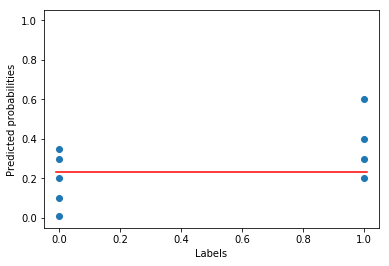

In [5]:
plt.scatter(y_true, y_predict_proba)
plt.plot([-0.01, 1.01], [threshold, threshold], c='red')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("Labels")
plt.ylabel("Predicted probabilities")
plt.show()

Чаще всего интервалы накладываются - тогда нужно аккуратно подбирать порог.

Самый неправильный алгоритм делает все наоборот: поднимает вероятности класса 0 выше вероятностей класса 1. Если так произошло, стоит посмотреть, не перепутались ли метки 0 и 1 при создании целевого вектора из сырых данных.

Для начала разберемся с метриками, оценивающие качество уже после бинаризации по порогу T, то есть сравнивающие два бинарных вектора: **y_true** и **predict**.

### 1.1 Сonfusion matrix (Таблица сопряженности)

In [6]:
from sklearn.metrics import confusion_matrix

|              _| Algorithm_1     | Algorithm_0    |
|-------------  |--------------   | ------------   |
| **True_1**    | True Positives  | False Negatives|
| **True_0**    | False Positives | True Negatives |


* **True Positives (TP)** — верно классифицированные положительные примеры (так называемые истинно положительные случаи);

* **True Negatives (TN)** — верно классифицированные отрицательные примеры (истинно отрицательные случаи);

* **False Positives (FP)** — отрицательные примеры (True_0), классифицированные как положительные (Algorithm_1) (ошибка I рода). В нашей задаче по определению оттока абонентов, ошибкой первого рода будет принятие лояльного абонента за уходящего;

* **False Negatives (FN)** — положительные примеры (True_1), классифицированные как отрицательные (Algorithm_0) (ошибка II рода). Соответственно, ошибкой второго рода будет являться "пропуск" уходящего абонента.

In [7]:
cm = confusion_matrix(y_true, y_predict, labels = [1, 0])
cm

array([[3, 1],
       [2, 3]])

In [8]:
tp, fn, fp, tn = cm.ravel()
(tp, fn, fp, tn)

(3, 1, 2, 3)

### 1.2 Accuracy (доля правильных ответов)

In [9]:
from sklearn.metrics import accuracy_score

$$accuracy = \frac {TN + TP}{TN + TP + FN + FP}\$$

In [10]:
# 1-й способ
acc = (tn + tp) / (tn + fp + fn + tp)
acc

0.6666666666666666

In [11]:
# 2-й способ
accuracy_score(y_true, y_predict)

0.6666666666666666

### 1.3. Precision (точность)

In [12]:
from sklearn.metrics import precision_score

_Точность показывает, какая доля объектов, определенная классификатором как положительные, действительно являются положительными_

$$precision = \frac {TP}{TP + FP}\$$

In [13]:
# 1-й способ
pr = tp / (tp + fp)
pr

0.6

In [14]:
# 2-й способ
precision_score(y_true, y_predict, labels = [1, 0])

0.6

Этот показатель не дает отнести все объекты к одному положительному классу

### 1.4 Recall (полнота)

In [15]:
from sklearn.metrics import recall_score

_Полнота показывает, какая доля положительных объектов была определена классификатором_

$$recall = \frac {TP}{TP + FN}\$$

In [16]:
# 1-й способ
rec = tp / (tp + fn)
rec

0.75

In [17]:
# 2-й способ
recall_score(y_true, y_predict, labels = [1, 0])

0.75

### 1.5 F1-score

In [18]:
from sklearn.metrics import f1_score

Обобщаяющая метрика - гармоническое среднее точности и полноты

$$f1 = \frac {2 * precision * recall}{precision + recall}\$$

In [19]:
# 1-й способ
f1 = 2*pr*rec/(pr+rec)
f1

0.6666666666666665

In [20]:
# 2-й способ
f1_score(y_true, y_predict, labels = [1, 0])

0.6666666666666665

# 2. Кривые в машинном обучении

### 2.1. Precision_Recall_Curve

In [21]:
from sklearn.metrics import precision_recall_curve, average_precision_score

Кривая строится в координатах полнота (Recall) и точность (Precision). 

In [22]:
prs, recs, thresholds = precision_recall_curve(y_true, y_predict_proba, pos_label=1)
pr_metric = np.round(average_precision_score(y_true, y_predict_proba), 2)

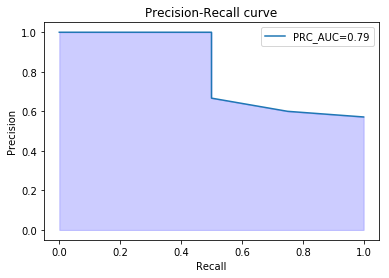

In [23]:
plt.plot(recs, prs, label='PRC_AUC={}'.format(pr_metric))
plt.fill_between(recs, prs, alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.title('Precision-Recall curve')
plt.show()

### 2.2 Метркики в зависимости от порога (threshold)

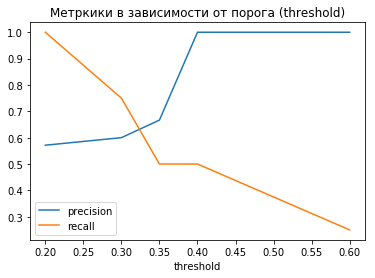

In [24]:
plt.plot(thresholds, prs[:-1], label="precision")
plt.plot(thresholds, recs[:-1], label="recall")
plt.xlabel("threshold")
plt.legend()
plt.title('Метркики в зависимости от порога (threshold)')
plt.show()

При увеличении порога мы делаем меньше ошибок FP и больше ошибок FN, поэтому одна из кривых растет, а вторая - падает. По такому графику можно подобрать оптимальное значение порога, при котором precision и recall будут приемлемы.

Приемлемые значения **precision** и **recall** определяются предметной областью. 

Например, в задаче определения, болен ли пациент определенной болезнью (0 - здоров, 1 - болен), ошибок **False negatives** стараются избегать, требуя большего значения **Recall**. Важно не пропустить наличие болезни.

### 2.3 ROC_AUC

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score

Одним из способов оценить модель в целом, не привязываясь к конкретному порогу, является AUC-ROC (или ROC AUC) — площадь (Area Under Curve) под кривой ошибок (Receiver Operating Characteristic curve ). Данная кривая представляет из себя линию от (0,0) до (1,1) в координатах True Positive Rate (TPR) и False Positive Rate (FPR):

**AUC ROC равен доле пар объектов вида (объект класса 1, объект класса 0), которые алгоритм верно упорядочил.**

а) Доля объектов положительного класса мы правильно классифицировали

$$TPR = \frac {TP}{TP + FN}$$

б) Доля объектов отрицательного класса, которых мы ошибочно отнесли к положительному

$$FPR = \frac {FP}{FP + TN}$$

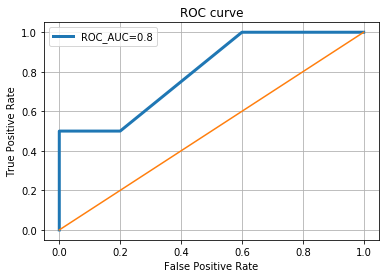

In [26]:
fpr, tpr, thresholds = roc_curve(y_true, y_predict_proba, pos_label=1)
roc_auc_metric = np.round(roc_auc_score(y_true, y_predict_proba), 2)

plt.plot(fpr, tpr, lw=3, label='ROC_AUC={}'.format(roc_auc_metric))
plt.plot([0, 1], [0, 1])
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC curve')
plt.grid()
plt.show()

Чем выше показатель AUC, тем качественнее классификатор, при этом значение 0,5 демонстрирует непригодность выбранного метода классификации (соответствует случайному гаданию). Значение менее 0,5 говорит, что классификатор действует с точностью до наоборот: если положительные назвать отрицательными и наоборот, классификатор будет работать лучше.

<img align="center" src="../img/pic2.png"/>

Оптимизировать AUC ROC напрямую затруднительно по нескольким причинам:

* эта функция недифференцируема по параметрам алгоритма,
* она в явном виде не разбивается на отдельные слагаемые, которые зависят от ответа только на одном объекте (как происходит в случае log_loss).

In [27]:
df.sort_values(by=['predict_proba'], ascending=False)

,true,predict_proba,predict
object_4,1,0.60,1
object_8,1,0.40,1
object_9,0,0.35,1
object_1,0,0.30,1
object_6,1,0.30,1
object_3,0,0.20,0
object_5,1,0.20,0
object_2,0,0.10,0
object_7,0,0.01,0


# 3. Функция потерь

In [28]:
from sklearn.metrics import log_loss

Log_loss вычисляет правдоподобие меток в **true** с вероятностями из **predict_proba**, взятое с противоположным знаком:

$log\_loss(actual, predicted) = - \frac 1 n \sum_{i=1}^n (actual_i \cdot \log (predicted_i) + (1-actual_i) \cdot \log (1-predicted_i))$, $n$ - длина векторов.

Соответственно, эту метрику нужно минимизировать. 

Интерпретировать величину достаточно сложно: метрика не достигает нуля никогда и не имеет верхней границы. Поэтому даже для идеального алгоритма, если смотреть только на одно значение log_loss, невозможно понять, что он идеальный.

In [29]:
def logloss_metric(y_true, y_predict_proba):
    return - (y_true * np.log(y_predict_proba) + (1 - y_true) * np.log(1 - y_predict_proba))


In [30]:
# 1-й способ
logloss_metric(y_true, y_predict_proba).mean()

0.5962821483618784

In [31]:
# 2-й способ
log_loss(y_true, y_predict_proba)

0.5962821483618784

# 4. Заключение

* Precision и recall не зависят, в отличие от accuracy, от соотношения классов и потому применимы в условиях несбалансированных выборок. Часто в реальной практике стоит задача найти оптимальный баланс между этими двумя метриками
* 

**Ссылки**

* http://www.navan.name/roc/